<a href="https://colab.research.google.com/github/iam-pattan/Exploring-ML/blob/main/SVD_on_img.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget -c 'https://upload.wikimedia.org/wikipedia/en/0/00/The_Child_aka_Baby_Yoda_%28Star_Wars%29.jpg' -O Baby_Yoda.jpg

--2021-03-09 12:22:26--  https://upload.wikimedia.org/wikipedia/en/0/00/The_Child_aka_Baby_Yoda_%28Star_Wars%29.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 91.198.174.208, 2620:0:862:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|91.198.174.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 33307 (33K) [image/jpeg]
Saving to: ‘Baby_Yoda.jpg’

Baby_Yoda.jpg       100%[===================>]  32.53K  --.-KB/s    in 0.005s  

2021-03-09 12:22:26 (6.73 MB/s) - ‘Baby_Yoda.jpg’ saved [33307/33307]



In [ ]:
!wget 'https://myfirstlearningbucket.s3.ap-south-1.amazonaws.com/pic.jpeg'

--2021-03-12 04:32:32--  https://myfirstlearningbucket.s3.ap-south-1.amazonaws.com/pic.jpeg
Resolving myfirstlearningbucket.s3.ap-south-1.amazonaws.com (myfirstlearningbucket.s3.ap-south-1.amazonaws.com)... 52.219.64.7
Connecting to myfirstlearningbucket.s3.ap-south-1.amazonaws.com (myfirstlearningbucket.s3.ap-south-1.amazonaws.com)|52.219.64.7|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37557 (37K) [image/jpeg]
Saving to: ‘pic.jpeg’

pic.jpeg            100%[===================>]  36.68K   153KB/s    in 0.2s    

2021-03-12 04:32:33 (153 KB/s) - ‘pic.jpeg’ saved [37557/37557]



In [ ]:
import matplotlib.pyplot as plt
import cv2 
import skimage 
from numpy import linalg
from numpy import array
import numpy as np

(<matplotlib.axes._subplots.AxesSubplot at 0x7f97a924fb10>,
 <matplotlib.image.AxesImage at 0x7f97a91db1d0>)

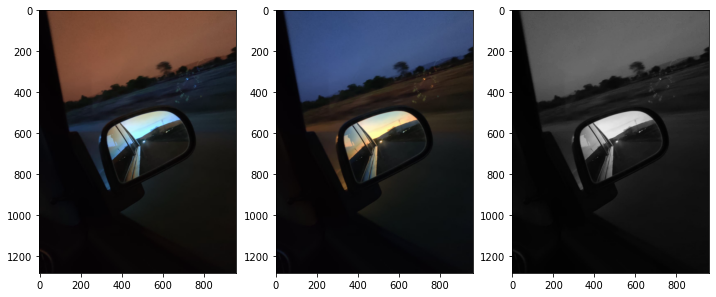

In [ ]:
img = cv2.imread('/content/pic.jpeg')
img_bgr = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV_FULL)

plt.rcParams['figure.figsize'] = (12,8)
plt.subplot(131), plt.imshow(img)
plt.subplot(132), plt.imshow(img_bgr)
plt.subplot(133),plt.imshow(img_gray, cmap='gray')

Text(0.5, 1.0, 'Median')

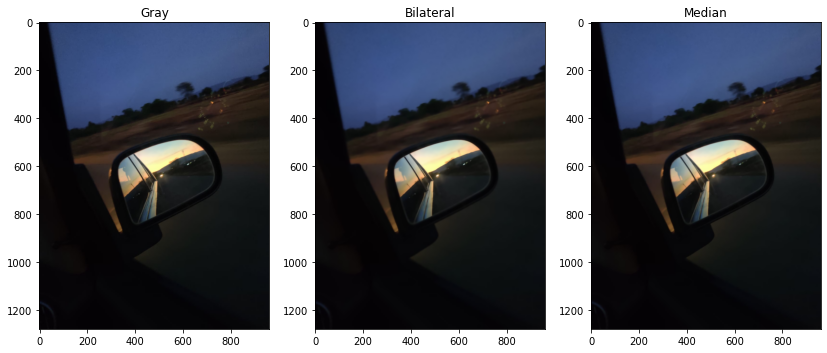

In [ ]:
# RGB 
img_bil = cv2.bilateralFilter(img_bgr, 9, 75, 75)
img_med = cv2.medianBlur(img_bgr, 5)

plt.rcParams['figure.figsize'] = (14,9)
plt.subplot(131), plt.imshow(img_bgr, cmap='gray')
plt.title('Gray')
plt.subplot(132), plt.imshow(img_bil, cmap='gray')
plt.title('Bilateral')
plt.subplot(133), plt.imshow(img_med, cmap='gray')
plt.title('Median')

Text(0.5, 1.0, 'Median')

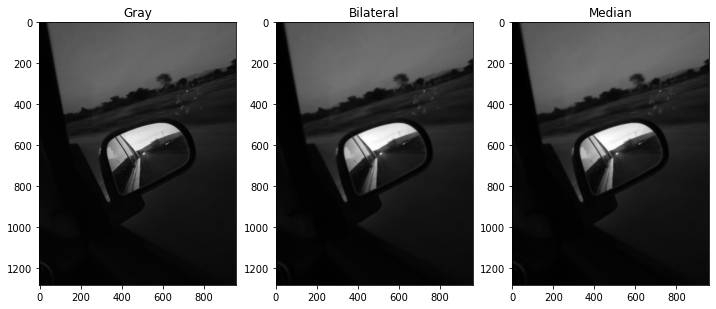

In [ ]:
img_blur = cv2.bilateralFilter(img_gray, 9, 75, 75)
img_median = cv2.medianBlur(img_gray, 5)

plt.rcParams['figure.figsize'] = (12,8)
plt.subplot(131), plt.imshow(img_gray, cmap='gray')
plt.title('Gray')
plt.subplot(132), plt.imshow(img_blur, cmap='gray')
plt.title('Bilateral')
plt.subplot(133), plt.imshow(img_blur, cmap='gray')
plt.title('Median')

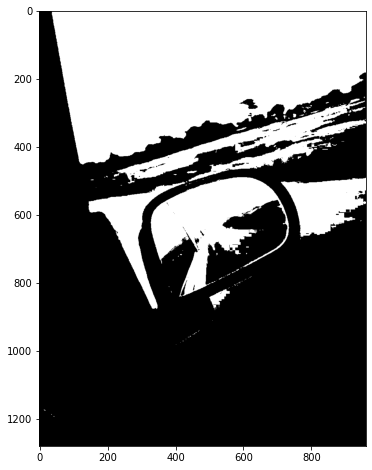

In [ ]:
thresh = 30

im_bw = cv2.threshold(img_gray, thresh, 255, cv2.THRESH_BINARY)[1]
plt.imshow(im_bw, cmap='gray')

Text(0.5, 1.0, 'Gaussian_Threshold')

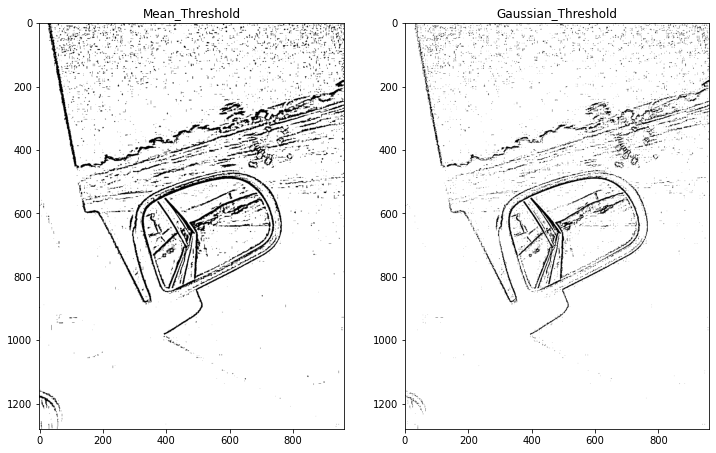

In [ ]:
th2 = cv2.adaptiveThreshold(img_gray,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img_gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)

plt.subplot(121), plt.imshow(th2, cmap='gray')
plt.title('Mean_Threshold')
plt.subplot(122),plt.imshow(th3, cmap='gray')
plt.title('Gaussian_Threshold')

In [ ]:
img_array = img_bgr / 255
img_array.max(), img_array.min()

(1.0, 0.0)

In [ ]:
img_array.dtype

dtype('float64')

In [ ]:
red_array = img_array[:, :, 0]
green_array = img_array[:, :, 1]
blue_array = img_array[:, :, 2]

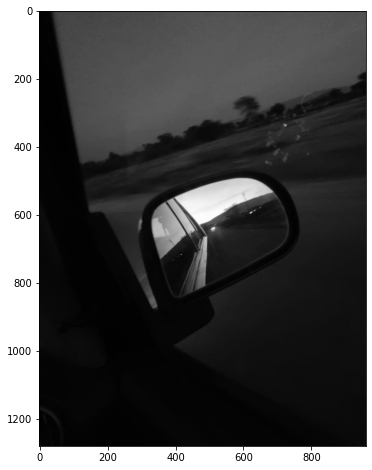

In [ ]:
from numpy import linalg
img_gray = img_array @ [0.2126, 0.7152, 0.0722]
plt.imshow(img_gray, cmap="gray")

In [ ]:
U, s, Vt = linalg.svd(img_gray)
U.shape, s.shape, Vt.shape

((1280, 1280), (960,), (960, 960))

In [ ]:
import numpy as np
Sigma = np.zeros((1280, 960))
for i in range(960):
  Sigma[i, i] = s[i]

Sigma.shape

(1280, 960)

In [ ]:
# what's '@' symbol in python

a, b = np.random.rand(3,5), np.random.rand(5,3)
print(a @ b , "\n\n",a.dot(b), a.dtype)

A, B =  np.random.randint(1,10,10), np.random.randint(11,20,10)
print("\n", A @ B, sum(A * B), A.dtype, "\n")

[[0.50666612 1.84670988 1.15175572]
 [0.46201414 1.10353856 0.54858425]
 [0.26404492 0.72986144 0.41243747]] 

 [[0.50666612 1.84670988 1.15175572]
 [0.46201414 1.10353856 0.54858425]
 [0.26404492 0.72986144 0.41243747]] float64

 681 681 int64 



In [ ]:
linalg.norm(img_gray - U @ Sigma @ Vt)

6.388289082080736e-13

In [ ]:
np.allclose(img_gray, U @ Sigma @ Vt)

True

Text(0.5, 1.0, 'k=60')

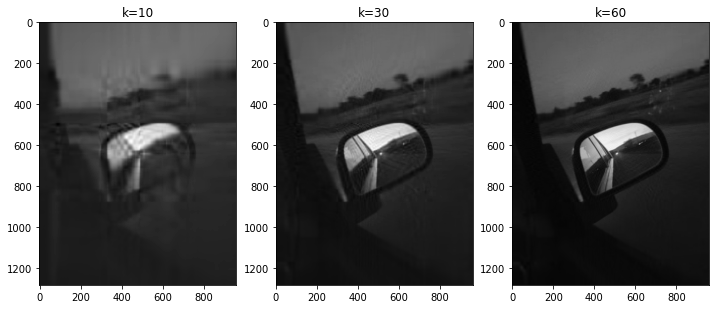

In [ ]:
k1, k2, k3 = 10, 30, 60
approx1 = U @ Sigma[:, :k1] @ Vt[:k1, :]
approx2 = U @ Sigma[:, :k2] @ Vt[:k2, :]
approx3 = U @ Sigma[:, :k3] @ Vt[:k3, :]

plt.subplot(131), plt.imshow(approx1, cmap='gray')
plt.title('k=10')
plt.subplot(132), plt.imshow(approx2, cmap='gray')
plt.title('k=30')
plt.subplot(133), plt.imshow(approx3, cmap='gray')
plt.title('k=60')

In [ ]:
cv2.imwrite('/content/img1.jpeg', approx1)
cv2.imwrite('/content/img2.jpeg', approx2)
cv2.imwrite('/content/img3.jpeg', approx3)

True

In [ ]:
import os
pth1 = '/content/img3.jpeg'
pth2 = '/content/pic.jpeg'

os.path.getsize(pth1) / 1024, os.path.getsize(pth2) / 1024, "size in KB"

(14.9697265625, 36.6767578125, 'size in KB')

## **Bombai potava raja Bobai potava**

ayyeeeee

Nee code ikkada

In [ ]:
# img_gray = cv2.resize(img_bgr, (317, 317))
# img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# plt.imshow(img_gray)

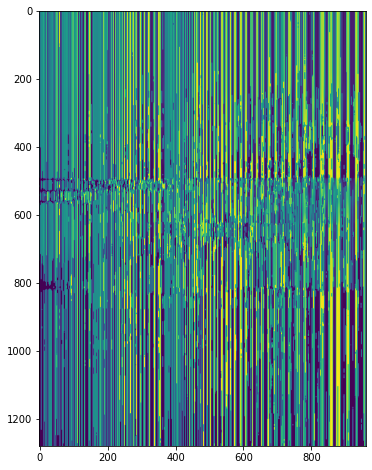

In [ ]:
data = img_gray / img_gray.max() #normalizes data in range 0 - 255
data = 255 * data
img_gray1 = data.astype(np.uint8)
plt.imshow(img12)

In [ ]:
U, s, V = np.linalg.svd(img_gray1)

In [ ]:
U.shape, S.shape, VT.shape, s.shape, V.shape 

((1280, 1280), (1280, 10), (10, 960), (960,), (960, 960))

In [ ]:
VT = np.transpose(V)
S = np.zeros((img_gray.shape[0], img_gray.shape[1]))
S[:img_gray.shape[1], :img_gray.shape[1]] = np.diag(s)
n_component = 10
S = S[:, :n_component]
VT = VT[:n_component, :]
A = U.dot(S.dot(VT))
print(A)

[[  7.50284106 -11.3512352    5.29775123 ...  24.35066017 -81.29355944
  -12.19135335]
 [  7.51945196 -11.37636836   5.30955439 ...  24.37508311 -81.34400676
  -12.24931858]
 [  7.54653208 -11.41655947   5.32967832 ...  24.43055589 -81.33968769
  -12.42689605]
 ...
 [  0.38739679  -0.59580751   0.26731285 ...   1.41362048  -5.57558622
   -2.04406466]
 [  0.38756236  -0.59604739   0.2674349  ...   1.41274946  -5.57632164
   -2.04619952]
 [  0.38772762  -0.59628445   0.26755842 ...   1.41188144  -5.57714864
   -2.04819584]]


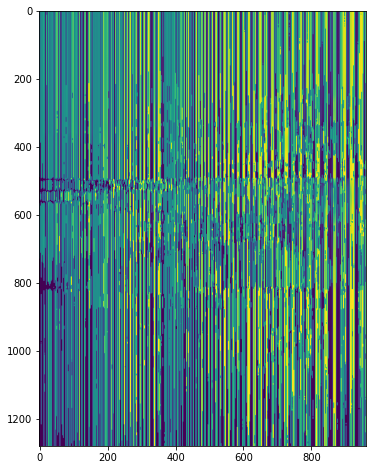

In [ ]:
data = A / A.max() #normalizes data in range 0 - 255
data = 255 * data
img12 = data.astype(np.uint8)
plt.imshow(img12)

In [ ]:
# A1 = np.add(A, 255)/255
X = np.clip(A.astype('uint8'), 0, 255)
X

array([[  7, 245,   5, ...,  24, 175, 244],
       [  7, 245,   5, ...,  24, 175, 244],
       [  7, 245,   5, ...,  24, 175, 244],
       ...,
       [  0,   0,   0, ...,   1, 251, 254],
       [  0,   0,   0, ...,   1, 251, 254],
       [  0,   0,   0, ...,   1, 251, 254]], dtype=uint8)

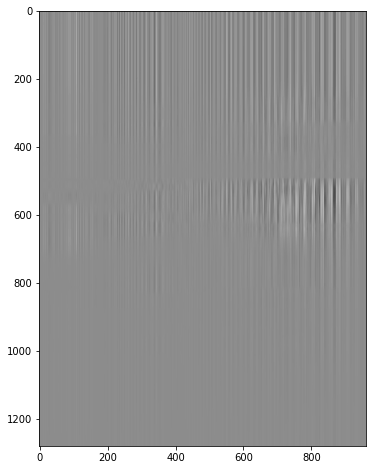

In [ ]:
plt.imshow(A, cmap='gray')